# Analyses Descriptives - Qualité de l'Air et Données Socio-Économiques
**Auteur:** Aymeric et Théo  
**Objectif:** Consolider les données urbaines, touristiques et de qualité de l'air pour analyser les corrélations et la représentativité des stations de mesure.

Commençons par importer les bibliothèques principales pour le traitement de données, la visualisation et la modélisation, ainsi que les scripts contenants les fonctions les plus volumineuses. Tous les imports sont faits au début pour les centraliser et ainsi éviter de les oublier ou de les répéter plusieurs fois.

In [1]:
# 1. Configuration et Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
from scripts import preprocessing as prep
from scripts import descriptive_visualization as viz

# Settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
viz.setup_styles()

print("Environnement chargé avec succès.")

Environnement chargé avec succès.


## Partie 1 : Traitement des données Villes & Tourisme
Nous chargeons les données brutes, telles que récupérées sur le site de l'INSEE et de Geodair. Nos données économiques et démographiques (éco-démo dans la suite) sont divisées en 2 datasets, qu'il convient alors de fusionner pour n'en manipuler qu'un seul, contenant toutes les informations sur les villes. Cette fusion des deux datasets requiert d'être vigilant aux noms et types des variables sur lesquelles s'opère la jointure. A ce titre, des conversions de des renommages sont effectués.

Aussi, le champs de notre étude ne porte que sur les villes en France métropolitaine. Ainsi, les villes de Corse et d'outre-mer sont supprimées de notre base de données.

In [2]:
# Chargement et Preprocessing Villes
# Chemins d'accès
path_air = "data/raw_data/data_air_2022.csv"
path_villes = "data/raw_data/data.csv"
path_tourisme = "data/raw_data/BDD_tourisme_communes_2022.csv"

# Chargement initial des datasets
df_raw_villes, df_air = prep.load_and_merge_cities(path_air, path_villes, path_tourisme)

print(f"Après fusion : {df_raw_villes.shape[0]} lignes, {df_raw_villes.shape[1]} colonnes")
print(f"Doublons détectés : {df_raw_villes.duplicated().sum()}")
print(f"Nom des colonnes : {list(df_raw_villes.columns)}")

# Nettoyage (Renommage, Typage, Filtrage DOM-TOM)
df_villes_clean = prep.process_city_data(df_raw_villes)

# Sauvegarde intermédiaire
df_villes_clean.to_csv("data/processed_data/data_villes_tourisme.csv", index=False)

print(f"Dataset Villes nettoyé : {df_villes_clean.shape}")
display(df_villes_clean.head())

Après fusion : 34875 lignes, 12 colonnes
Doublons détectés : 0
Nom des colonnes : ['CODGEO', 'Libellé', 'Part des effectifs des commerces, transports, services divers 2023', 'Population municipale 2022', "Nombre d'établissements 2023", 'Densité de population (historique depuis 1876) 2022', "Taux d'activité par tranche d'âge 2022", 'Médiane du niveau de vie 2021', "Part des effectifs de l'industrie 2023", 'Part des effectifs de la construction 2023', 'Nb_hotels_2022', 'Nb_campings_2022']
Dataset Villes nettoyé : (34386, 12)


,code_geo,libelle,part_commerce_transport_services_2023,population_2022,nb_etablissements_2023,densite_population_2022,taux_activite_2022,mediane_niveau_vie_2021,part_industrie_2023,part_construction_2023,nb_hotels_2022,nb_campings_2022
0,1001,L'Abergement-Clémenciat,19.2,859.0,16.0,53.9,82.1,25820.0,0.0,30.8,0.0,0.0
1,1002,L'Abergement-de-Varey,50.0,273.0,4.0,29.8,80.1,24480.0,0.0,0.0,0.0,0.0
2,1004,Ambérieu-en-Bugey,54.6,15554.0,599.0,632.3,76.7,21660.0,7.5,6.0,1.0,0.0
3,1005,Ambérieux-en-Dombes,27.9,1917.0,45.0,120.4,81.3,24610.0,19.8,15.2,2.0,1.0
4,1006,Ambléon,0.0,114.0,1.0,19.4,70.8,24210.0,0.0,0.0,0.0,0.0


## Partie 2 : Analyses Descriptives (Villes)
Commençons par étudier ce dataset contenant des informations sur toutes les villes de France. Cette approche exploratoire nous permettra de construire des éléments de référence pour l'analyse des relevés de pollution. Il s'agit ici de construire des histogrammes pour approximer la distributions de nos variables, ainsi qu'un corrélogramme pour donner un aperçu des relations linéaires qui unissent les variables.

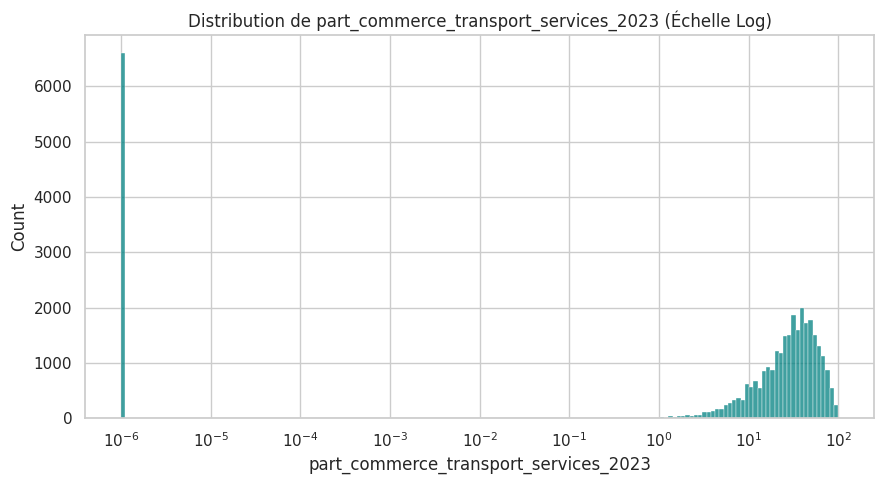

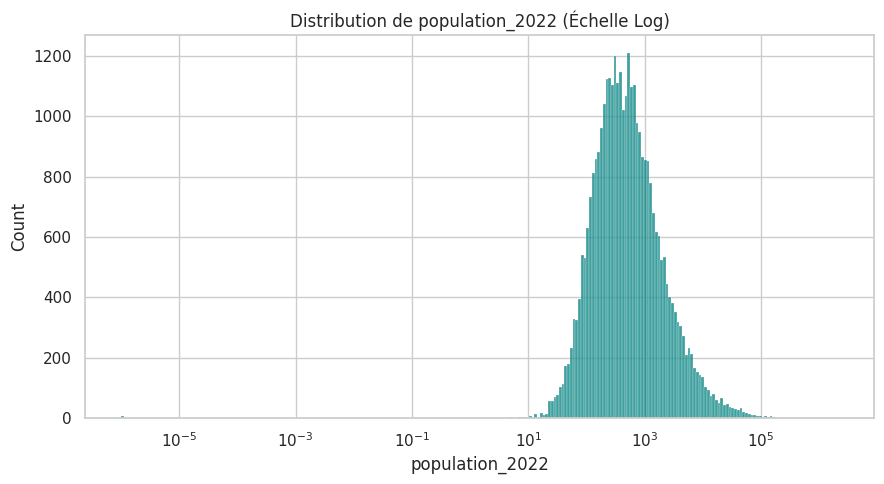

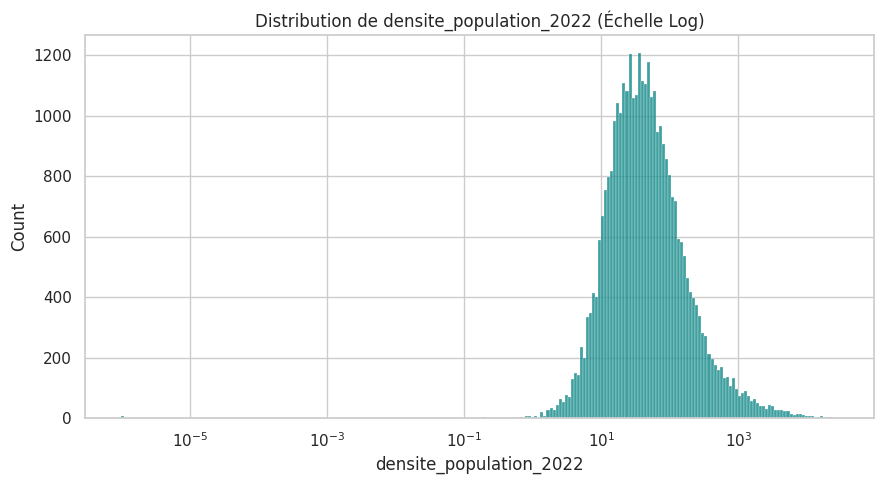

Graphiques de distribution générés dans 'output/Desc_All_Cities'


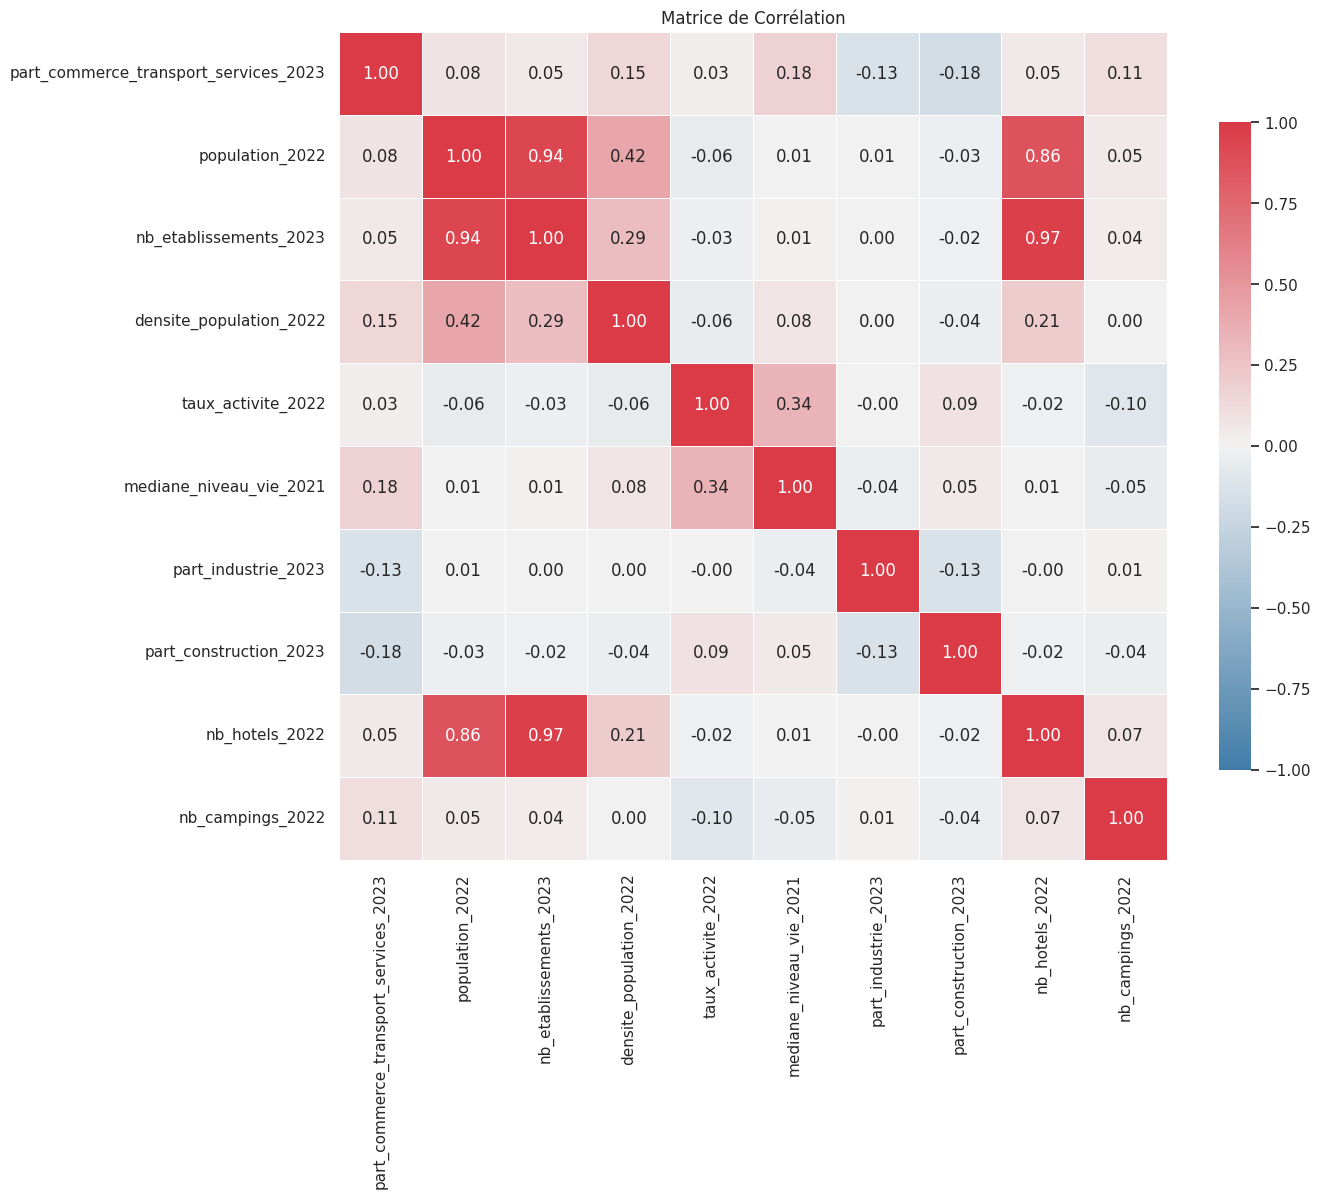

Matrice de corrélation générée.


In [3]:
# Visualisation des distributions
dists_to_save = ['nb_etablissements_2023', 'taux_activite_2022',
                 'mediane_niveau_vie_2021', 'part_industrie_2023',
                 'part_construction_2023', 'nb_hotels_2022', 'nb_campings_2022']
dists_to_save_and_plot = ['part_commerce_transport_services_2023', 'population_2022', 'densite_population_2022']
viz.plot_distributions(df_villes_clean, dists_to_save, display=False)
viz.plot_distributions(df_villes_clean, dists_to_save_and_plot, display=True)

print("Graphiques de distribution générés dans 'output/Desc_All_Cities'")


# Matrice de Corrélation
viz.plot_correlation_heatmap(df_villes_clean, display=True)
print("Matrice de corrélation générée.")

**Analyse des distributions:** On observe que les distributions des variables éco-démo. des villes sont, pour la plupart, de 2 types. En effet, certaines semblent se rapprocher d'une distribution gaussienne (ex: population_2022, densite_population_2022) tandis que d'autres semblent présenter une forte inflation en 0, combinée avec une gaussienne (ex: part_commerce_transport_services_2023). L'étude de toutes les distributions montre que les caractéristiques des villes de France sont très homogènes, avec néanmoins une grande majorité de petites villes rurales avec peu d'activité économique et commerciale (ce qui explique l'inflation en 0 de certaines distributions.)

**Analyse du corrélogramme:** Quelques variables semblent très corrélées (linéairement). En particulier, le nombre d'établissements dans la ville en 2023 est un excellent proxy (presque proportionnel) à la population de cette même ville et à son nombre d'hotels. Remarquons aussi que dans une moindre mesure, les villes les plus peuplées sont aussi les plus denses.

## Partie 3 : Fusion avec les données Qualité de l'Air (Geodair)
Maintenant que nous en savons plus les villes de France, il est temps de comparer avec les villes ayant des stations de mesure. Pour cela, commençons par joindre les données des relevés de pollution avec les données éco-démo des villes dans lesquelles ces relevés sont effectués.

In [4]:
# 5. Chargement Geodair et Merge
geodair = pd.read_csv("data/processed_data/geodair_2022_villes_codgeo2.csv", sep=",")
print("Extrait de la base de données GEODAIR:")
display(geodair.head(5))
# Préparation et fusion (gestion des codgeo, types)
df_etude_complete = prep.prepare_geodair_data(geodair, df_villes_clean)
print("Extrait de la base de données d'étude complète:")
display(df_etude_complete.head(5))
# Sauvegarde du dataset complet
df_etude_complete.to_csv("data/processed_data/data_etude_villes_relevees.csv", index=False, sep=";")

print(f"Dataset Étude Complet : {df_etude_complete.shape}")

Extrait de la base de données GEODAIR:


,Date de début,Date de fin,Organisme,code zas,Zas,code site,nom site,type d'implantation,Polluant,type d'influence,Réglementaire,type d'évaluation,type de valeur,valeur,valeur brute,unité de mesure,taux de saisie,couverture temporelle,couverture de données,code qualité,validité,Latitude,Longitude,Ville,CODGEO,Latitude_commune,Longitude_commune
0,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01011,Metz-Centre,Urbaine,O3,Fond,Oui,mesures fixes,Moy. annuelle,51.0,50.614131,µg-m3,NaN,NaN,NaN,R,1,49.119442,6.180833,Metz,57463.0,49.108113,6.195525
1,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01011,Metz-Centre,Urbaine,O3,Fond,Oui,mesures fixes,Moy. annuelle,51.0,50.614131,µg-m3,NaN,NaN,NaN,R,1,49.119442,6.180833,Metz,57463.0,49.108113,6.195525
2,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01011,Metz-Centre,Urbaine,O3,Fond,Oui,mesures fixes,Moy. annuelle,51.0,50.614131,µg-m3,NaN,NaN,NaN,R,1,49.119442,6.180833,Metz,57463.0,49.108113,6.195525
3,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01018,Scy-Chazelles,Périurbaine,O3,Fond,Oui,mesures fixes,Moy. annuelle,54.0,53.926047,µg-m3,NaN,NaN,NaN,R,1,49.107502,6.122775,Scy-Chazelles,57642.0,49.114042,6.119849
4,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01020,Thionville-Centre,Urbaine,O3,Fond,Oui,mesures fixes,Moy. annuelle,53.0,53.333492,µg-m3,NaN,NaN,NaN,R,1,49.358337,6.156942,Thionville,57672.0,49.375972,6.129283


Extrait de la base de données d'étude complète:


,date_debut,date_fin,organisme,code_zas,nom_zas,code_site,nom_site,type_implantation,polluant,type_influence,reglementaire,type_evaluation,type_valeur,valeur,valeur_brute,unite,taux_saisie,couverture_temporelle,couverture_donnees,code_qualite,validite,latitude_site,longitude_site,ville,codgeo,latitude_commune,longitude_commune,nom_commune,part_commerce_transport_services_2023,population_2022,nb_etablissements_2023,densite_population_2022,taux_activite_2022,mediane_niveau_vie_2021,part_industrie_2023,part_construction_2023,nb_hotels_2022,nb_campings_2022
0,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01011,Metz-Centre,Urbaine,O3,Fond,Oui,mesures fixes,Moy. annuelle,51.0,50.614131,µg-m3,NaN,NaN,NaN,R,1,49.119442,6.180833,Metz,57463,49.108113,6.195525,Metz,45.8,121695.0,5203.0,2901.6,70.9,20940.0,4.6,3.6,26.0,1.0
1,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01011,Metz-Centre,Urbaine,O3,Fond,Oui,mesures fixes,Moy. annuelle,51.0,50.614131,µg-m3,NaN,NaN,NaN,R,1,49.119442,6.180833,Metz,57463,49.108113,6.195525,Metz,45.8,121695.0,5203.0,2901.6,70.9,20940.0,4.6,3.6,26.0,1.0
2,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01011,Metz-Centre,Urbaine,O3,Fond,Oui,mesures fixes,Moy. annuelle,51.0,50.614131,µg-m3,NaN,NaN,NaN,R,1,49.119442,6.180833,Metz,57463,49.108113,6.195525,Metz,45.8,121695.0,5203.0,2901.6,70.9,20940.0,4.6,3.6,26.0,1.0
3,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01018,Scy-Chazelles,Périurbaine,O3,Fond,Oui,mesures fixes,Moy. annuelle,54.0,53.926047,µg-m3,NaN,NaN,NaN,R,1,49.107502,6.122775,Scy-Chazelles,57642,49.114042,6.119849,Scy-Chazelles,67.8,2665.0,80.0,589.6,75.3,28380.0,0.3,7.9,0.0,0.0
4,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01020,Thionville-Centre,Urbaine,O3,Fond,Oui,mesures fixes,Moy. annuelle,53.0,53.333492,µg-m3,NaN,NaN,NaN,R,1,49.358337,6.156942,Thionville,57672,49.375972,6.129283,Thionville,43.8,42778.0,1494.0,857.6,77.0,24850.0,6.4,2.9,8.0,1.0


Dataset Étude Complet : (2034, 38)


## Partie 4 : Agrégation et Analyse Comparative
Enfin, avant de mener nos analyses, remarquons que certaines villes possèdent plusieurs points de mesure. Pour n'avoir qu'un point par ville et par polluant, on agrège les valeurs des relevés au sein d'une même ville en prenant la moyenne de ceux-ci.

In [5]:
# Agrégation par Polluant et Ville
df_groupe = prep.aggregate_by_pollutant(df_etude_complete)

polluants = df_groupe["polluant"].unique()
print(f"Polluants identifiés : {polluants}")

Polluants identifiés : ['NOX as NO2' 'O3' 'PM10' 'PM2.5']


Pour chacun de nos 4 polluants, nous étudions l'échantillon de villes associé. Pour préparer les analyses suivantes, nous divisons notre dataset en 4 (un dataset par polluant).

Pour les analyses, nous comparons:

- Le proportion de petites/moyennes/grandes villes de nos échantillons
- Les moyennes des variables éco-démo.
- Les distributions des variables éco-démo.

Polluants identifiés : ['NOX as NO2' 'O3' 'PM10' 'PM2.5']
--- Traitement : NOX as NO2 ---

>> Distribution par taille de ville pour : NOX as NO2


,Nb_Villes,Proportion (%),Moyenne_Mesures
taille_ville,,,
Rurale (<2k),26,12.21,7.731
Petite (2-10k),30,14.08,20.833
Moyenne (10-50k),87,40.85,22.546
Grande (>50k),70,32.86,32.191


--- Traitement : O3 ---

>> Distribution par taille de ville pour : O3


,Nb_Villes,Proportion (%),Moyenne_Mesures
taille_ville,,,
Rurale (<2k),44,16.73,62.545
Petite (2-10k),46,17.49,56.457
Moyenne (10-50k),109,41.44,54.917
Grande (>50k),64,24.33,55.917


--- Traitement : PM10 ---

>> Distribution par taille de ville pour : PM10


,Nb_Villes,Proportion (%),Moyenne_Mesures
taille_ville,,,
Rurale (<2k),25,9.69,14.240
Petite (2-10k),46,17.83,16.957
Moyenne (10-50k),114,44.19,17.009
Grande (>50k),73,28.29,18.533


--- Traitement : PM2.5 ---

>> Distribution par taille de ville pour : PM2.5


,Nb_Villes,Proportion (%),Moyenne_Mesures
taille_ville,,,
Rurale (<2k),20,12.05,8.050
Petite (2-10k),15,9.04,10.100
Moyenne (10-50k),70,42.17,9.979
Grande (>50k),61,36.75,10.295


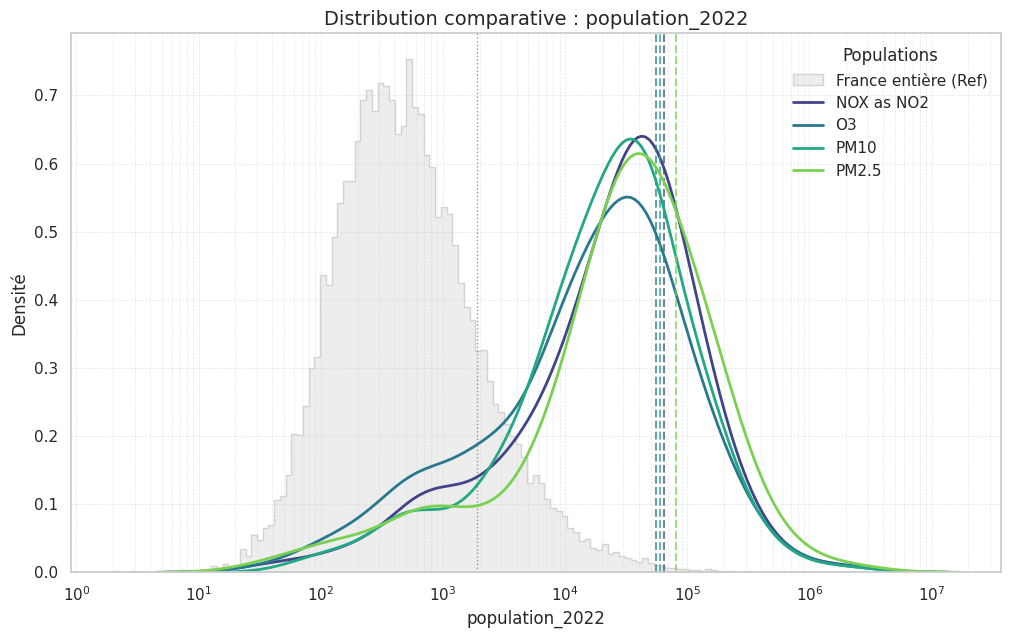

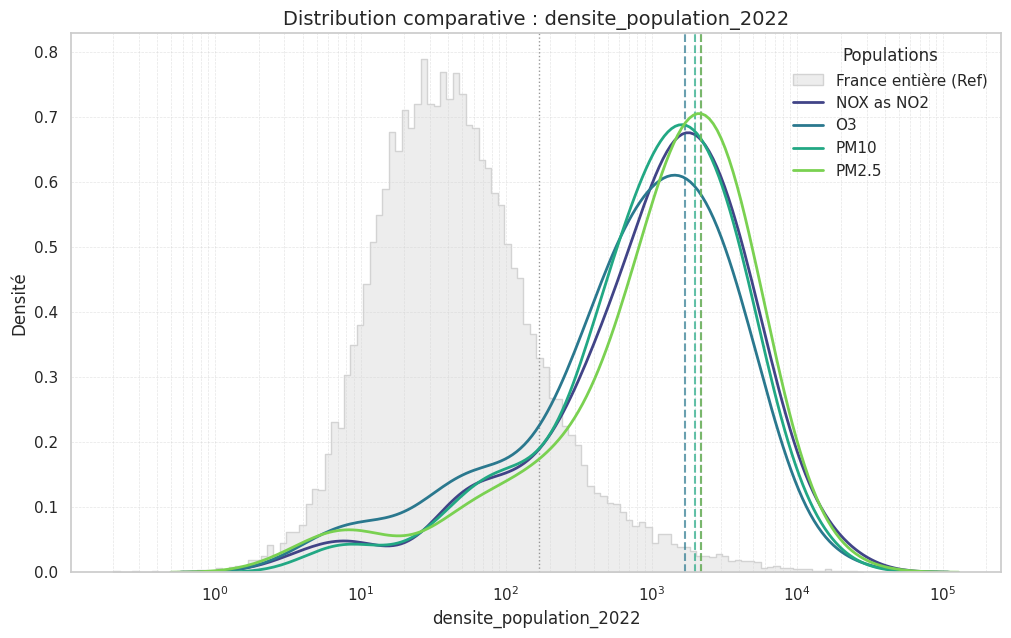

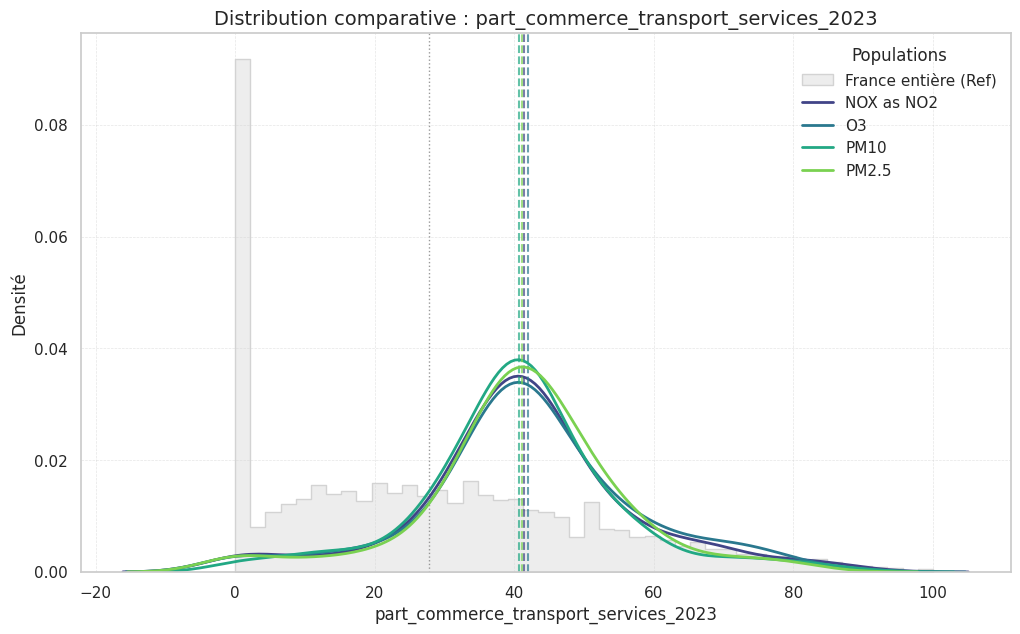

Graphiques générés dans : output/plots_comparaison

Analyse terminée. Tous les graphiques sont générés.


In [6]:
polluants = df_groupe["polluant"].unique()
print(f"Polluants identifiés : {polluants}")
# Génération des Datasets par Polluant et Plots Comparatifs
vars_eco = {
    "population_2022": True,
    "mediane_niveau_vie_2021": False,
    "densite_population_2022": True,
    "part_commerce_transport_services_2023": True,
    "part_industrie_2023": False,
    "nb_hotels_2022": False,
    "nb_etablissements_2023": False,
    "taux_activite_2022": False,
    "part_construction_2023": False,
    "nb_campings_2022": False
}

df_combined = {}
for pol in polluants:
    print(f"--- Traitement : {pol} ---")
    
    # Filtre et Sauvegarde
    df_pol = df_groupe[df_groupe["polluant"] == pol]
    df_pol.to_csv(f"data/processed_data/BDD_par_polluant/dataset_{pol}_final.csv", index=False, sep=';')
    df_combined[pol] =df_pol
    # Comparaison des proportions de petites, moyennes et grandes villes
    stats = prep.analyze_city_size_distribution(df_pol, pol)
    display(stats)
    
    # Plots Comparatifs (France vs Echantillon)
    viz.plot_comparative_distributions(
        df_sample=df_pol, 
        df_france=df_villes_clean, 
        polluant_name=pol, 
        vars_eco=vars_eco,
    )

    # Etude des corrélations entre la concentration de polluant et les variables éco-démo.
    viz.plot_correlation_heatmap(df_pol, pol=pol)

viz.plot_combined_distributions_per_var(df_combined, df_villes_clean, vars_eco,)
print("\nAnalyse terminée. Tous les graphiques sont générés.")

**Analyse des tableaux récapitulatifs:** On remarque que les échantillons de chaque polluant comportent globalement les mêmes proportions de chaque taille de ville. En particulier, les moyennes et grandes villes sont majoritaires dans nos échantillons, et donc sur-représentées par rapport à la distribution de toutes les villes de France. Nos échantillons ne sont donc pas représentatifs des villes françaises, mais cela ne pose pas de problème pour les analyses à suivre.

De plus, remarquons que seuls les "NOX as NO2" semblent être dépendant de la taille de la ville. Ce constat est attendu car ce polluant est principalement émis par le transport routier et le secteur industriel. A l'inverse, l'O3, les PM2.5 et les PM10 sont des polluants eux aussi d'origine humaine, mais que l'on pourrait qualifier d'indirects, ie. formés à l'issue de réactions chimiques post-émissions. A ce titre, la corrélation entre concentration de ces polluants et taille de la ville.

**Analyse des graphes:** Ces graphiques donnent des informations plus précises sur les différences entre nos échantillons et l'ensemble des villes de France. Ces graphes confirment les analyses précédentes:

- Les distributions pour chaque polluant sont très semblables
- Les distributions des variables éco-démo des villes dans les échantillons de chaque polluant sont différentes de celles pour toutes les villes de France. En particulier, la grande proportion de villes moyennes et grandes est visible.

# Partie 5: Modélisation par arbres
Dans cette partie, nous tentons d'expliquer/prédire la qualité de l'air observée dans une ville à l'aide de ses caractéristiques éco-démo. Seuls les arbres CART seront considérés. En effet, il n'est pas envisageable d'aller plus loin avec des Random Forest faute d'observations (Autour de 200 observations par polluant).

In [7]:
# Configuration
polluants = ["NOX as NO2", "O3", "PM10", "PM2.5"]
features = [
    "population_2022", 
    "mediane_niveau_vie_2021",
    "densite_population_2022",
    "part_commerce_transport_services_2023",
    "part_industrie_2023", 
    "nb_hotels_2022", 
    "nb_etablissements_2023", 
    "taux_activite_2022",
    "part_construction_2023", 
    "nb_campings_2022"
]
target = "valeur"
seed = 2003


PROCESSING: NOX as NO2
Meilleurs params. : {'ccp_alpha': 0.0, 'max_depth': None, 'max_leaf_nodes': 10, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 20, 'min_samples_split': 2}
R2: 0.207


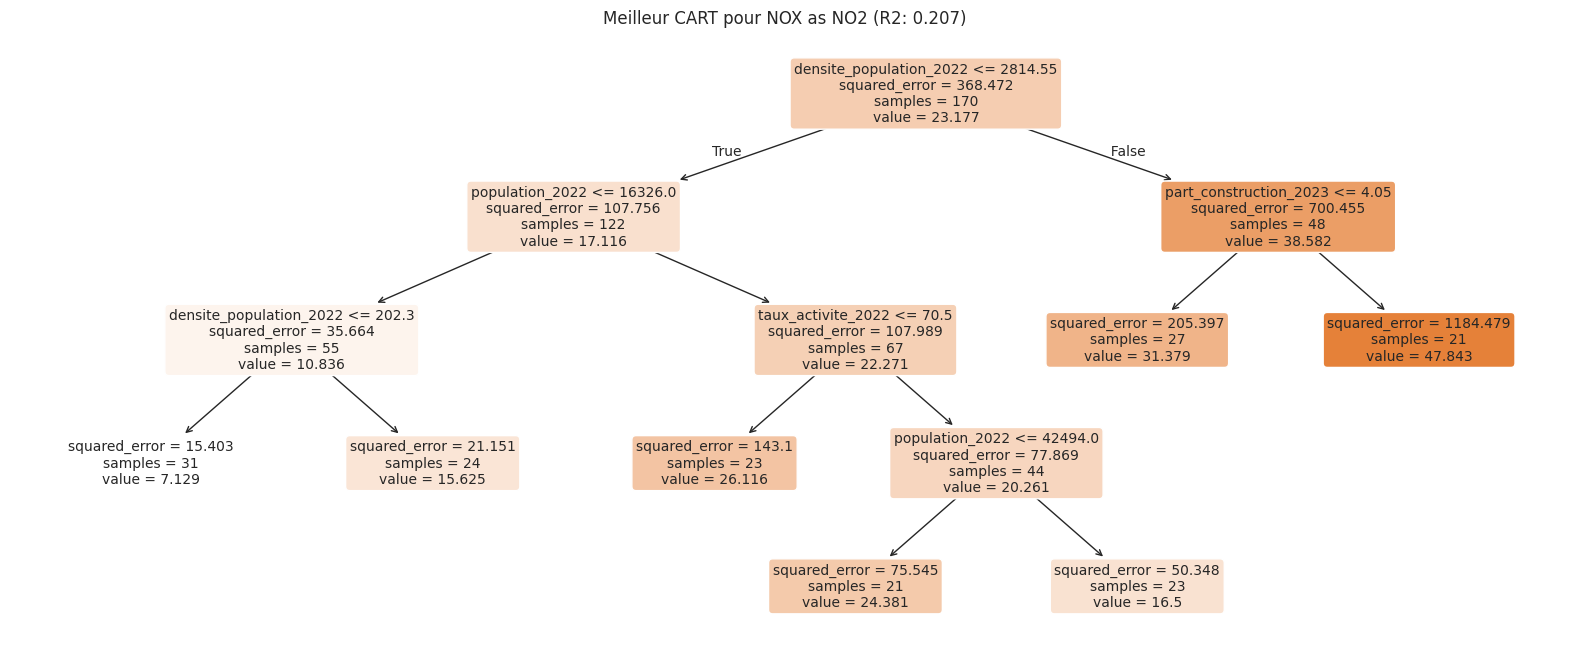


PROCESSING: O3
Meilleurs params. : {'ccp_alpha': 0.0, 'max_depth': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 30, 'min_samples_split': 2}
R2: 0.077


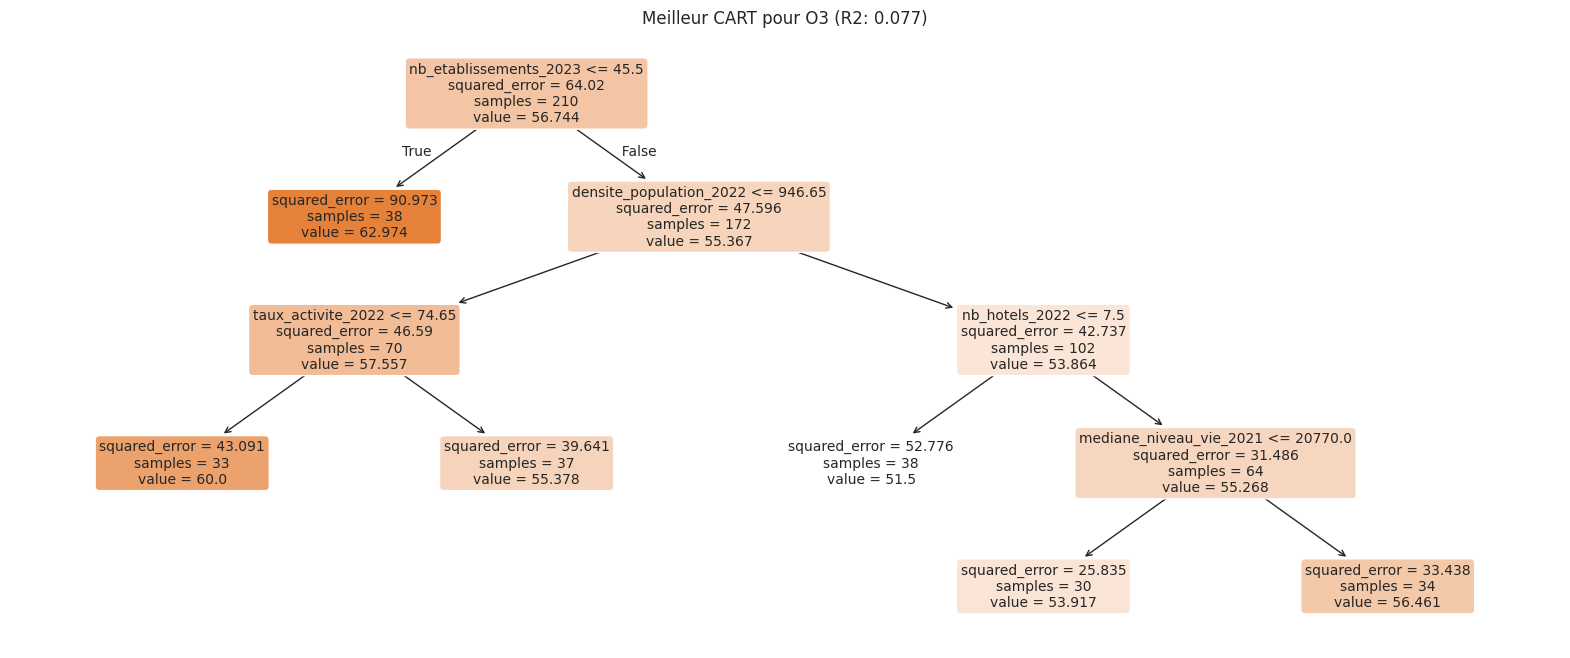


PROCESSING: PM10
Meilleurs params. : {'ccp_alpha': 0.0, 'max_depth': 3, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 20, 'min_samples_split': 2}
R2: 0.042


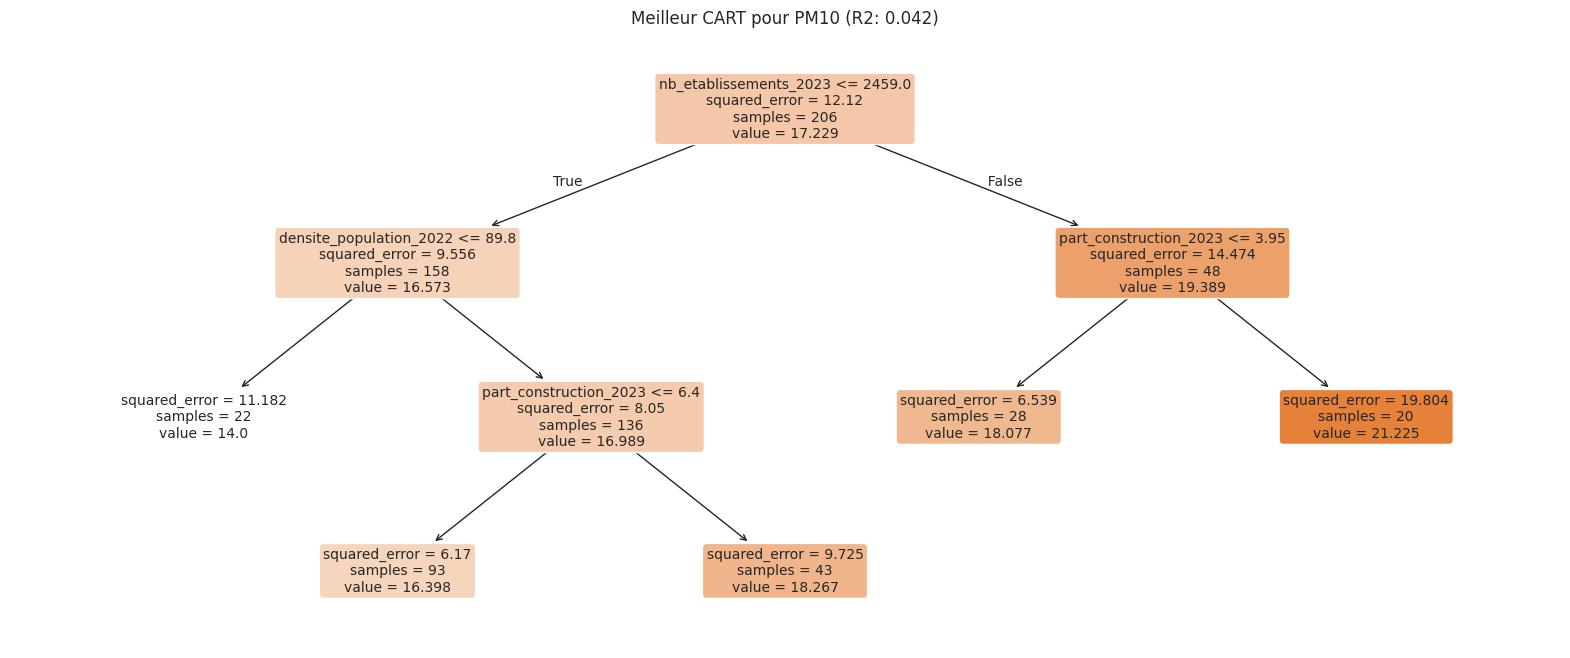


PROCESSING: PM2.5
Meilleurs params. : {'ccp_alpha': 0.0, 'max_depth': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.001, 'min_samples_leaf': 30, 'min_samples_split': 2}
R2: -0.207


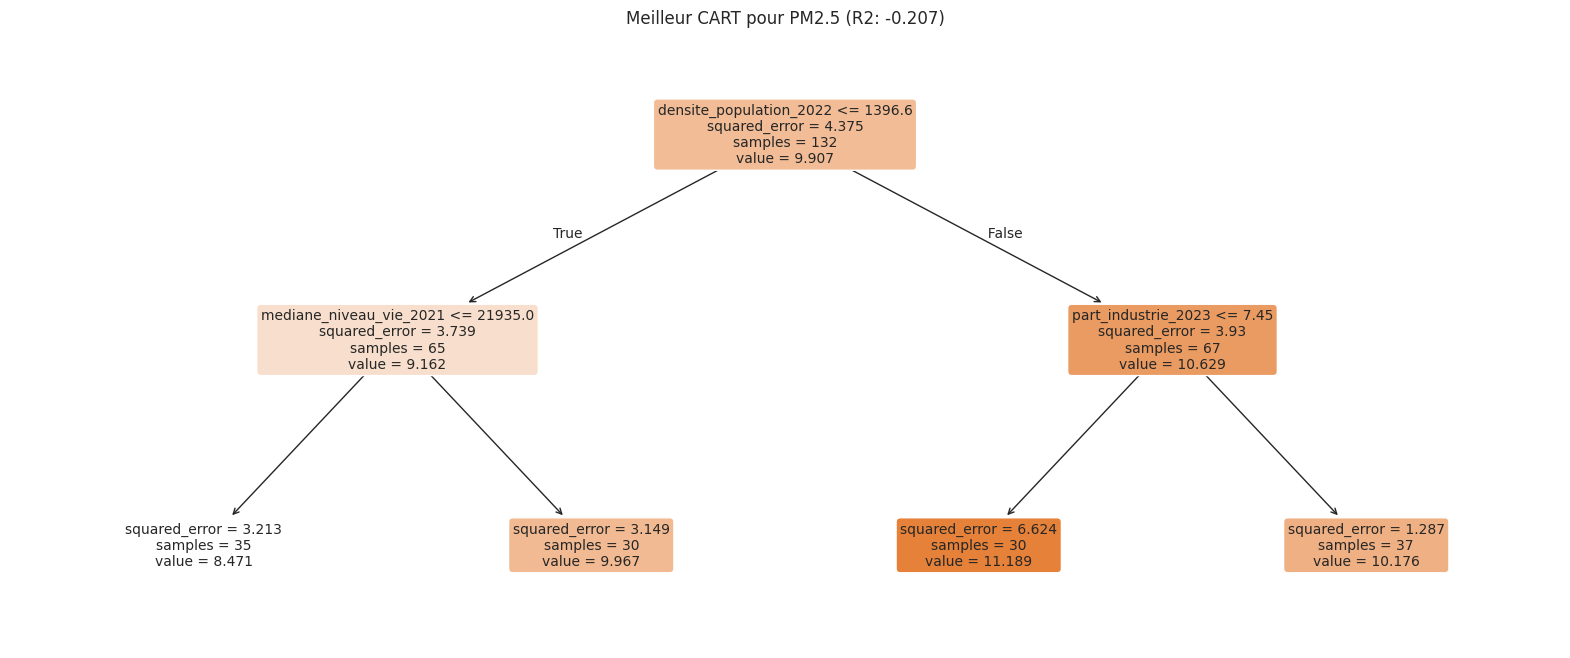

In [8]:
# Tableau dans lequel seront stockés les métriques de chaque arbre
results_table = []

# Boucle principale

for pol in polluants:
    print(f"\n{'='*40}")
    print(f"PROCESSING: {pol}")
    print(f"{'='*40}")
    
    # Import des données
    file_path = f"data/processed_data/BDD_par_polluant/dataset_{pol}_final.csv"
    df = pd.read_csv(file_path, sep=';')

    X = df[features]
    y = df[target]
    
    # Split des données en éch. de train et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    
    # Implémentation du GridSearch (pour trouver le meilleur arbre par polluant)
    param_grid = {
        # 1. Tree Geometry (Growth Control)
        'max_depth': [None, 3, 5, 7, 10, 15],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 5, 10, 20, 30],
        'max_leaf_nodes': [None, 5, 10, 20],
        
        # 2. Feature & Impurity Thresholds
        'min_impurity_decrease': [0.001, 0.01, 0.1],
        
        # 3. Pruning
        'ccp_alpha': [0.0] + list(np.logspace(-4, -1, 5)) # From 0.0001 to 0.1
    }
    
    model = DecisionTreeRegressor(criterion="squared_error", random_state=seed)
    
    # Cross-Validation
    grid = GridSearchCV(model, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    best_model = grid.best_estimator_
    
    # Prédiction et calcul des métriques
    y_pred = best_model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    # Sauvegarde des résultats
    results_table.append({
        "Pollutant": pol,
        "R2 Score": round(r2, 3),
        "RMSE": round(rmse, 3),
        "MAE": round(mae, 3),
        "Best Depth": best_model.max_depth,
        "Min Samples Split": best_model.min_samples_split,
        "Min Samples Leaf": best_model.min_samples_leaf,
        "Max leaf nodes": best_model.max_leaf_nodes,
        "Max features": best_model.max_features,
        "Min impurity decrease": best_model.min_impurity_decrease,
        "CCP Alpha": best_model.ccp_alpha
    })
    
    print(f"Meilleurs params. : {grid.best_params_}")
    print(f"R2: {r2:.3f}")
    
    # Affichage de l'arbre
    plt.figure(figsize=(20, 8))
    plot_tree(
        best_model, 
        feature_names=features, 
        filled=True, 
        rounded=True, 
        fontsize=10, 
    )
    plt.title(f"Meilleur CART pour {pol} (R2: {r2:.3f})")
    plt.show()

In [9]:
# Affichage des résultats dans un tableau final

print("\n" + "#"*30)
print(" Résultats finaux ")
print("#"*30)
df_results = pd.DataFrame(results_table)
# Par ordre de performance (R2)
df_results = df_results.sort_values(by="R2 Score", ascending=False)
display(df_results)


##############################
 Résultats finaux 
##############################


,Pollutant,R2 Score,RMSE,MAE,Best Depth,Min Samples Split,Min Samples Leaf,Max leaf nodes,Max features,Min impurity decrease,CCP Alpha
0,NOX as NO2,0.207,15.897,10.661,NaN,2,20,10.0,None,0.001,0.0
1,O3,0.077,6.422,4.867,NaN,2,30,NaN,None,0.001,0.0
2,PM10,0.042,3.472,2.736,3.0,2,20,NaN,None,0.001,0.0
3,PM2.5,-0.207,1.791,1.437,NaN,2,30,NaN,None,0.001,0.0


##### **Analyse des arbres**

**NOX as NO2:**
Cet arbre est de loin le plus performant car il explique plus de 20% de la variance de la concentration de polluant. Les variables les plus déterminantes pour expliquer la concentration de NOX as NO2 dans l'air sont la densité de population, la population et la part d'établissements dédiés à la construction en ville. Ces constats sont cohérents avec les analyses descriptives précédentes.

**Autres polluants:**
On constate que la densité de population revient systématique parmi les facteurs principaux d'explication de la concentration des polluants dans l'air. 

Néanmoins, pour ces polluants, la qualité de la modélisation est particulièrement mauvaise.
Notre hypothèse est que nous tentons d'expliquer la concentration de ces polluants dans l'air, un phénomène très complexe et multifactoriel, par un nombre très restreint de variables. Des variables relatives à la météorologie, l'agriculture, la topographie des lieux sont aussi essentiels pour une modélisation plus proche du réel.

NB: certains modèles d'arbres peuvent présenter des R2 négatifs. Cela est tout à fait possible compte-tenu de la définition du R2 retenue par scikit-learn ici. Cela indique notamment que les performances du modèle sont pires que celles d'un modèle qui prédirait la moyenne de l'échantillon 100% du temps.